C:\Users\jackparsons210\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


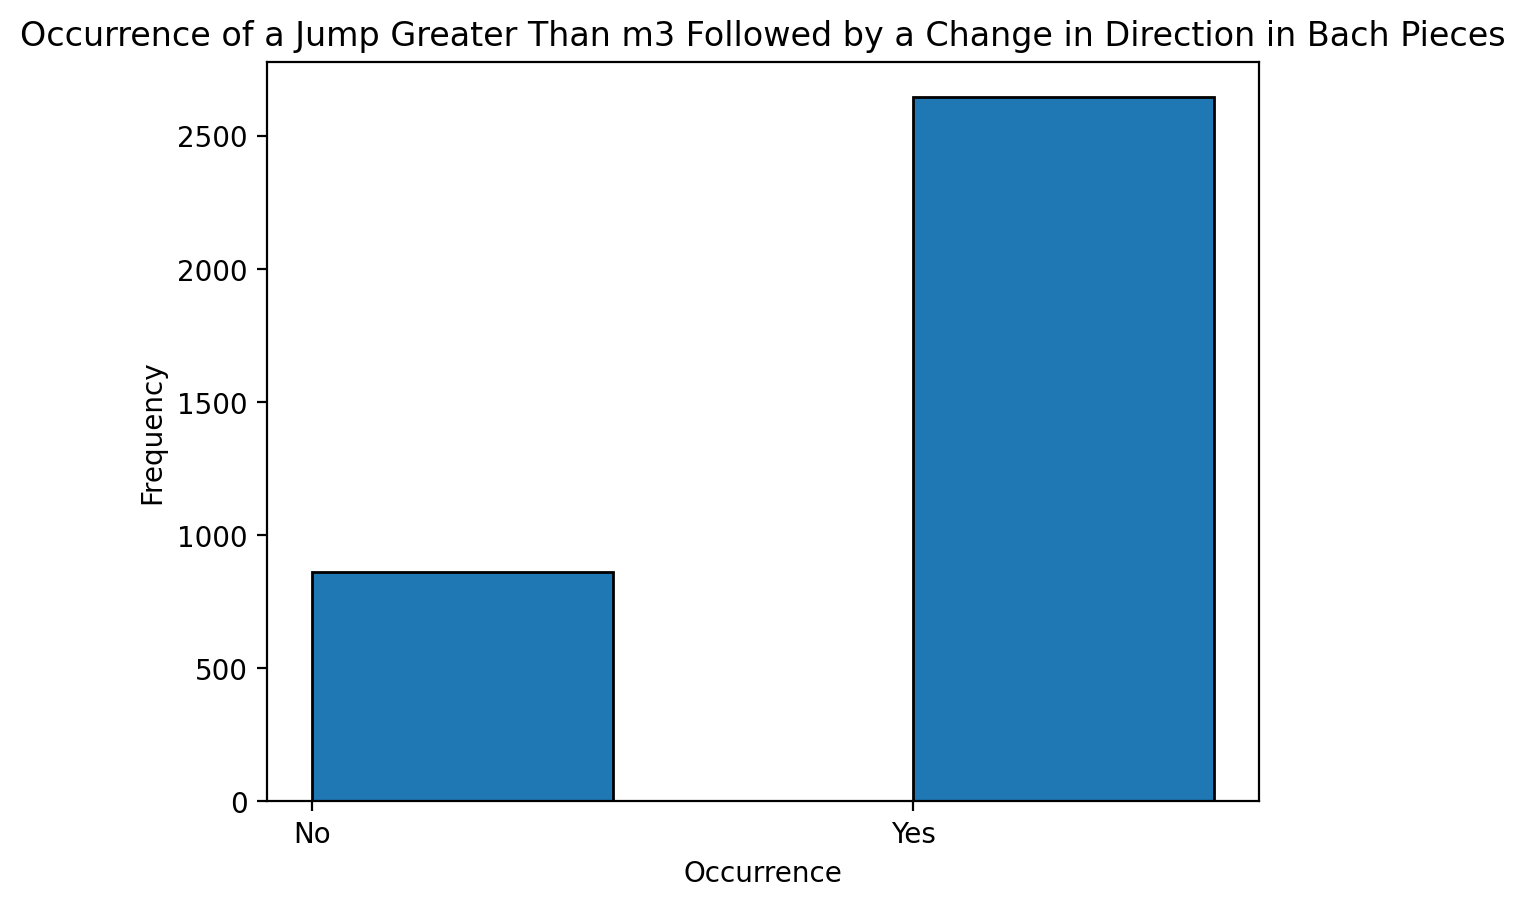

In [1]:
from music21 import corpus, interval
import matplotlib.pyplot as plt

# Initialize a list to store the occurrence of a jump followed by a change in direction
jump_followed_by_change_counts = []

# Initialize a counter for the pieces
piece_counter = 0

# Iterate over all Bach pieces in the music21 corpus
for piece_name in corpus.getComposer('bach'):
    if piece_counter >= 100:
        break # Stop after analyzing the first 100 pieces

    try:
        # Load the score
        score = corpus.parse(piece_name)

        # Iterate over each part (voice) in the score
        for part in score.parts:
            # Retrieve all notes for the current part
            part_notes = list(part.flat.notes)

            # Initialize a variable to store the highest note
            highest_note = None

            # Iterate through the notes to find the highest note
            for i in range(len(part_notes) - 2): # Adjusted to -2 to ensure there's a next note for comparison
                current_note = part_notes[i]
                next_note = part_notes[i + 1]
                following_note = part_notes[i + 2] # The note following the next note

                # Calculate the interval between the current note and the next note
                interval_between_notes = interval.notesToInterval(current_note, next_note)
                # Calculate the interval between the next note and the following note
                interval_to_following_note = interval.notesToInterval(next_note, following_note)

                # Determine the direction of the interval to the next note
                direction_to_next_note = "up" if current_note.pitch < next_note.pitch else "down"
                # Determine the direction of the interval to the following note
                direction_to_following_note = "up" if next_note.pitch < following_note.pitch else "down"

                # Check if the interval is a jump greater than a minor third (m3)
                if interval_between_notes.name in [ 'P4', 'P5', 'm6', 'M6', 'm7', 'M7']:
                    # Check if the direction changes after the jump
                    if direction_to_next_note != direction_to_following_note:
                        jump_followed_by_change_counts.append(1)
                    else:
                        jump_followed_by_change_counts.append(0)

        piece_counter += 1
    except Exception as e:
        print(f"Error processing {piece_name}: {e}")

# Plot the histogram of the occurrence of a jump followed by a change in direction
plt.hist(jump_followed_by_change_counts, bins=[0, 0.5, 1, 1.5], edgecolor='black')
plt.title('Occurrence of a Jump Greater Than m3 Followed by a Change in Direction in Bach Pieces')
plt.xlabel('Occurrence')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


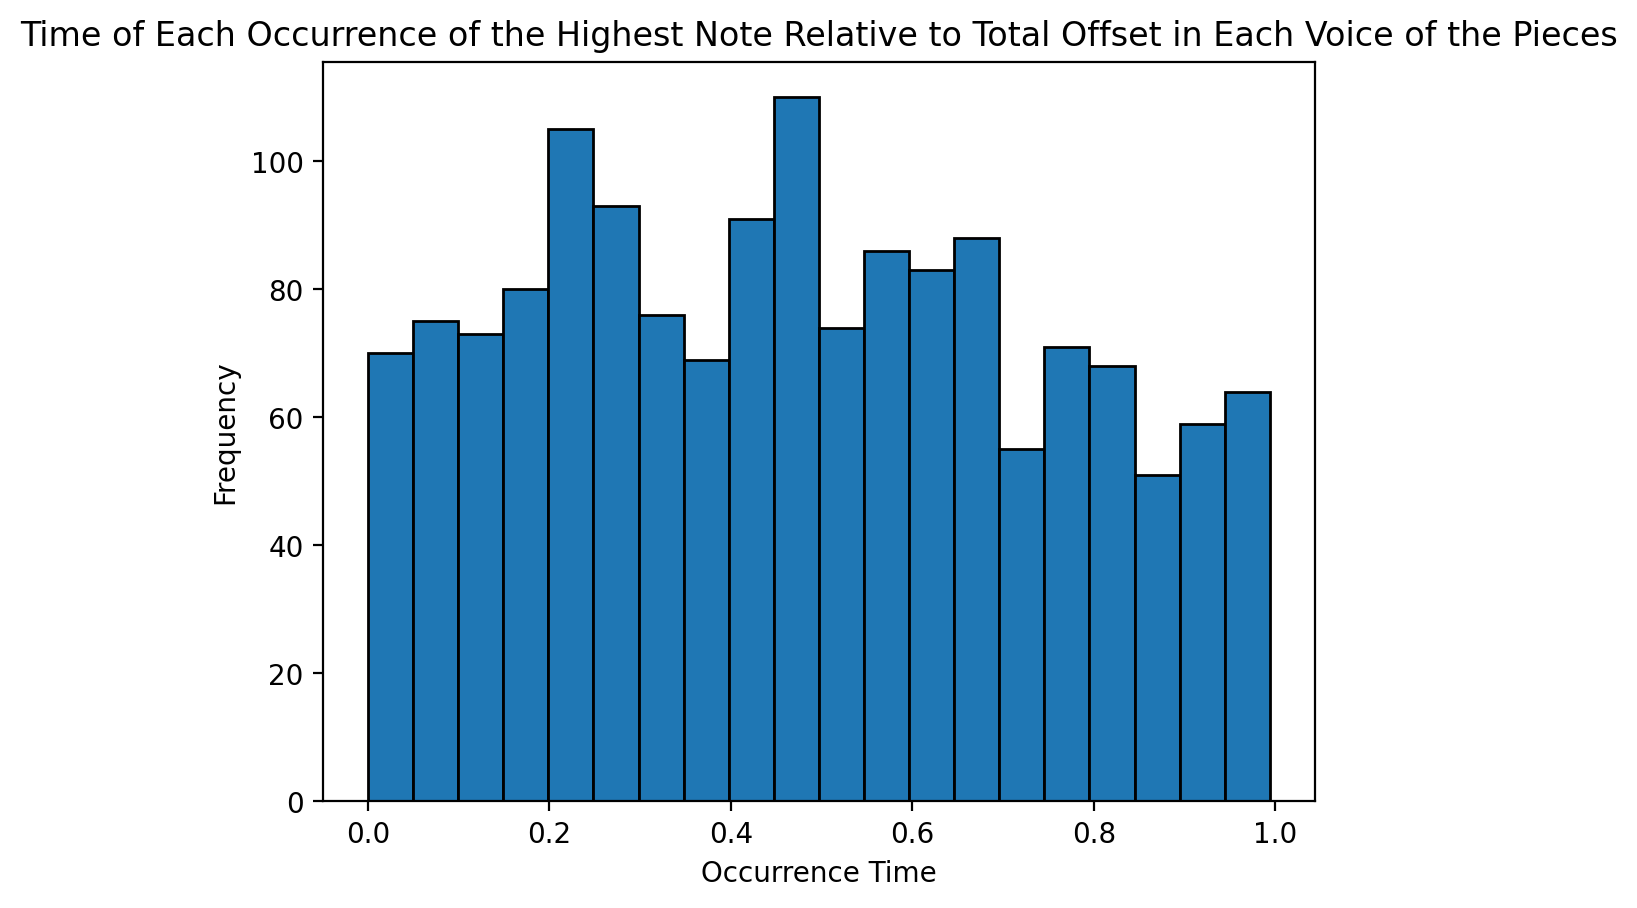

In [2]:
from music21 import corpus
import matplotlib.pyplot as plt

# Initialize a list to store the time of each occurrence of the highest note relative to the total offset of the piece
highest_note_occurrence_times = []

# Initialize a counter for the pieces
piece_counter = 0

# Iterate over all Bach pieces in the music21 corpus
for piece_name in corpus.getComposer('bach'):
    if piece_counter >= 100:
        break # Stop after analyzing the first 100 pieces

    try:
        # Load the score
        score = corpus.parse(piece_name)

        # Iterate over each part (voice) in the score
        for part in score.parts:
            # Retrieve all notes for the current part
            part_notes = list(part.flat.notes)

            # Initialize a variable to store the highest note
            highest_note = None

            # Iterate through the notes to find the highest note
            for note in part_notes:
                if highest_note is None or note.pitch > highest_note.pitch:
                    highest_note = note

            # Get the name of the highest note
            if highest_note is not None:
                highest_note_name = highest_note.pitch.nameWithOctave
                # Calculate the time of each occurrence of the highest note relative to the total offset of the piece
                total_offset = part.duration.quarterLength
                for note in part_notes:
                    if note.pitch == highest_note.pitch:
                        occurrence_time = note.offset / total_offset
                        highest_note_occurrence_times.append(occurrence_time)
            else:
                print(f"No notes found in the part of {piece_name}.")

        piece_counter += 1
    except Exception as e:
        print(f"Error processing {piece_name}: {e}")

# Plot the histogram of the time of each occurrence of the highest note relative to the total offset of the piece
plt.hist(highest_note_occurrence_times, bins=20, edgecolor='black')
plt.title('Time of Each Occurrence of the Highest Note Relative to Total Offset in Each Voice of the Pieces')
plt.xlabel('Occurrence Time')
plt.ylabel('Frequency')
plt.show()
